# ***Machine Learning with Python: Project Presentation***
---
## In partial fulfillment of Simplilearn Master Data Science Certification course | Due Date: Oct 01, 2020  

## Project name: Mercedes-Benz Greener Manufacturing.  
---
### Modeler and presenter : ***Samuel Y. Ntsua***  
### Trainer/Mentor : ***Vaishali Balaji***  
---

**Examining the data**  

In [2]:
## We can get the dataset directly from github <br>
## We just need the path to the raw data location. To do that, we add ""?raw=true" to the url link.
import pandas as pd

train_path ="https://github.com/Simplilearn-Edu/Machine-Learning--Projects/blob/master/Projects/Projects%20for%20Submission/Project%201%20-%20Mercedes-Benz%20Greener%20Manufacturing/Dataset%20for%20the%20project/train.zip?raw=true"
test_path ="https://github.com/Simplilearn-Edu/Machine-Learning--Projects/blob/master/Projects/Projects%20for%20Submission/Project%201%20-%20Mercedes-Benz%20Greener%20Manufacturing/Dataset%20for%20the%20project/test.zip?raw=true"

## load the dataset

mbtrain_df = pd.read_csv(train_path, compression='zip', header=0, sep=',', quotechar='"')
mbtest_df = pd.read_csv(test_path, compression='zip', header=0, sep=',', quotechar='"')


In [3]:
mbtrain_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mbtrain_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(f' {mbtrain_df.shape[0]} train observations \n {mbtrain_df.shape[1]} train columns \n {mbtest_df.shape[0]} test observations \n {mbtest_df.shape[1]} test columns')

 4209 train observations 
 378 train columns 
 4209 test observations 
 377 test columns


The data has a 378 columns.  
Using the traditional isnull().sum() to check on the missingness will not fit all 387 columns on the screen,  
Instead, we can use isnull.any() method to show only those columns that have null.  

In [6]:
mbtrain_df.columns[mbtrain_df.isnull().any()].tolist()

[]

In [7]:
# We can also count the null with:
mbtrain_df.isnull().sum().sum()

0

The above output shows there is not null values in train.  

Task 1: If for any column(s), the variance is equal to zero, then you need to remove those variable(s).  

---



This task is equivalent to removing columns or predictors with zero or near-zero variance.  
One way to identify zero variance features is that they have one unique value.  
But one must be careful not to systematically drop near-zero variance predictors as legitimate dummy predictors can have low variance.  

In [8]:
#####  Variance of each column. (standard deviation ==0 will also do : mbtrain_df.std(axis=0))
mbtrain_df.var(axis=0)

ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [9]:
type(mbtrain_df.var(axis=0))

pandas.core.series.Series

The object produced by `` mbtrain_df.var(axis=0)`` is a pandas series.  We can enumerate the elements, check if it is equal to zero,  
and if it is , we retain the corresponding index.  
Those are the features with zero variance to be dropped (they have near zero prediction power)  
``enumerate(mbtrain_df.var(axis=0))``  enumerates the elements  
``for ind,val in enumerate(mbtrain_df.var(axis=0))`` holds the elements in ind,val  
``for ind,val in enumerate(mbtrain_df.var(axis=0)) if val ==0`` checks if val is equal to zero  
``ind for ind,val in enumerate(mbtrain_df.var(axis=0)) if val ==0``  retains the corresponding index  
``[ind for ind,val in enumerate(mbtrain_df.var(axis=0)) if val ==0]`` packages the results into a list  

In [10]:
to_drop = [ind for ind,val in enumerate(mbtrain_df.var(axis=0)) if val ==0]

Now that we have candidates of zero-variance, let's explore further to see these columns  
to see if they are not legitimate dummy variables which can help understand the data as well as the model.  
As an example, gender variable is generally represented as 0/1 (or M/F). In a dataset of 10,000 rows, in which 50% is M and the other 50% is F,  
(a balance desired to minimize bias) the variance of the gender columns will be zero, but such variable can still contribute to the prediction power of the model.  
On the other hand, if only a relatively small fraction (say 2%) of gender is M in the data, it is clear that dropping such gender column will not  
reduce the model's power to predict.  
With this perspective in mind, let's dig further into our candidate variables to see how uniform their values are across all observation.  

In [11]:
mbtrain_df.iloc[:,to_drop]

,X1,X85,X99,X225,X227,X260,X281,X282,X285,X289,X322,X339
0,v,1,0,0,0,0,0,0,1,0,0,0
1,t,1,0,0,0,0,0,0,1,0,0,0
2,w,1,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,s,1,0,1,0,0,0,0,1,0,0,0
4205,o,0,0,0,0,0,1,0,0,0,0,0
4206,v,1,0,0,0,0,0,0,1,0,0,0
4207,r,0,0,0,0,0,0,0,0,0,0,0


In [12]:
mbtrain_df.iloc[:,to_drop].nunique()

X1      27
X85      2
X99      2
X225     2
X227     2
X260     2
X281     2
X282     2
X285     2
X289     1
X322     2
X339     2
dtype: int64

In [13]:
mbtrain_df.iloc[:,to_drop].sum()

X1      vtwtvbrlsbrrbrslraacasaarbrslaasbvebssblvvslha...
X85                                                  1718
X99                                                    36
X225                                                  408
X227                                                   13
X260                                                    1
X281                                                   11
X282                                                   17
X285                                                  866
X289                                                    0
X322                                                   92
X339                                                    1
dtype: object

The above three output shows that columns X85, X225 and X285 have non-negligible variability that may contribute the the model's power of prediction.  
As such, we keep them, while we drop X99, X227, X260, X281, X282, X289, X322 and X339  
The only column of constant value is X289  

Task 2: Check for null and unique values for test and train sets. 
 
---


We use the same method as above to check for unique and null in test data.

In [14]:
## Checking for null in test
mbtest_df.columns[mbtest_df.isnull().any()].tolist()

[]

In [15]:
mbtest_df.isnull().sum().sum()

0

The above output shows there is not null values in test

Checking for low-variance in test

In [16]:
mbtest_df.var(axis=0)

ID      5.871311e+06
X10     1.865006e-02
X11     2.375861e-04
X12     6.885074e-02
X13     5.734498e-02
            ...     
X380    8.014579e-03
X382    8.715481e-03
X383    4.750593e-04
X384    7.124196e-04
X385    1.660732e-03
Length: 369, dtype: float64

In [17]:
to_drop = [ind for ind,val in enumerate(mbtest_df.var(axis=0)) if val ==0]

In [18]:
to_drop 

[242, 243, 280, 281, 353]

In [19]:
mbtest_df.iloc[:,to_drop].nunique()

X249    2
X250    2
X287    2
X288    2
X361    2
dtype: int64

In [20]:
mbtest_df.iloc[:,to_drop].sum()

X249      40
X250    2340
X287      65
X288       1
X361    4051
dtype: int64

In [21]:
mbtrain_df.shape

(4209, 378)

X361 has 2 unique values, yet more than 92 % (4051/4209) takes on one of the values. It follows that X361 will not add significant prediction power to the model.  
X250's values are about 50/5, thus it should be kept.  
X249, X287, and X288 should be dropped from test data.  
In all, columns that will be drop in test date will also be dropped from train data, (and vise versa)  
because if a column did not participate in building the model, the model will poorly predict when tested on a data with such column.  
So we will be dropping : X249, X287, X288 X99, X227, X260, X281, X282, X289, X322 and X339 from both test and train.  

In [22]:
mbtrain_df.drop(['X249', 'X287', 'X288', 'X99', 'X227', 'X260', 'X281', 'X282', 'X289', 'X322', 'X339'], axis=1, inplace=True)
mbtest_df.drop(['X249', 'X287', 'X288', 'X99', 'X227', 'X260', 'X281', 'X282', 'X289', 'X322', 'X339'], axis=1, inplace=True)

In [23]:
print(f' After dropping zero-variance proedictors \n {mbtrain_df.shape[0]} train observations \n {mbtrain_df.shape[1]} train columns \n {mbtest_df.shape[0]} test observations \n {mbtest_df.shape[1]} test columns')

 After dropping zero-variance proedictors 
 4209 train observations 
 367 train columns 
 4209 test observations 
 366 test columns


Task 3: Apply label encoder.  

--- 


Let's see all columns that have 'object' as dtype to be label encoded

In [24]:
# For testing set
train2encode = mbtrain_df.select_dtypes(include=['object']).columns
# For testing set
test2encode = mbtest_df.select_dtypes(include=['object']).columns

In [25]:
print(f'Number of unique values in columns to be encoded: \n\nTraining set\n{mbtrain_df[train2encode].nunique()}\n\nTesting set\n{mbtest_df[test2encode].nunique()}' )

Number of unique values in columns to be encoded: 

Training set
X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

Testing set
X0    49
X1    27
X2    45
X3     7
X4     4
X5    32
X6    12
X8    25
dtype: int64


The above output shows the number of additional columns that will be generated should we hot-encode the string columns.

Label encoding has its flip side. While label encoding converts string categorical to numeric value so that machine learning algorithm can process  
the numerical values generated for the categories do not have numerical meaning per se. As such, Machine Learning algorithm may put numerical value on them,   
and mislead the algorithm to perform arithmetic operations on them.  
As an example, if the 4 values in column X4 are ``{Africa, America, Asia, Europe}``, the label encoding may encode them to ``{0,1,2,3}`` respectively  
and then evaluate them as ``Africa < America < Asia < Europe``; a relationship that does not make any sense.  
For that reason, the ideal situation is to hot-encode. However, given that the dataset is already huge, hot-encoding X0 for instance will generate additional 48 columns.  
Given this situation, we label encode the string columns.  
After evaluating the model with label encoded string columns, if we determine a poor performance, and especially, if we determine that some of the non-string features   
are not significant, we can drop them and then hot-encode the string columns in an attempt to find a better performing model.  

Let's label encode using sklearn.

In [26]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

In [27]:
# For training set
for encoded in enumerate(train2encode):
    mbtrain_df[encoded[1]]=labelenc.fit_transform(mbtrain_df[encoded[1]].values)

In [28]:
mbtrain_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# For testing set
for encoded in enumerate(test2encode):
    mbtest_df[encoded[1]]=labelenc.fit_transform(mbtest_df[encoded[1]].values)

In [30]:
mbtest_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


We can also check if there are duplicates rows.  
But first, we need to drop the ID column.

In [31]:
## Dropping ID
mbtrain_df.drop('ID',axis=1,inplace=True)
mbtest_df.drop('ID',axis=1,inplace=True)

In [32]:
## duplicates rows in training set?
print(mbtrain_df.duplicated().any())

True


In [33]:
## duplicates rows in testing set?
print(mbtest_df.duplicated().any())

True


Task 4: Perform dimensionality reduction.  

---


Before doing PCA, let's look at the range of the value of the features.  
I first start with Python RegEx ``^X`` to target all columns name starting with X.  
I use the RegEx to form a boolean list of True/False for columns starting with X/not starting with X, respectively ``mbtrain_df.columns.str.contains("^X")``.  
I then select those with ``df.loc[]``  

In [34]:
# For training set
mbtrain_df.loc[:,mbtrain_df.columns.str.contains("^X")].describe().T

,count,mean,std,min,25%,50%,75%,max
X0,4209.0,29.760751,13.738338,0.0,19.0,35.0,43.0,46.0
X1,4209.0,11.113566,8.531001,0.0,3.0,13.0,20.0,26.0
X2,4209.0,17.306486,10.899914,0.0,8.0,16.0,25.0,43.0
X3,4209.0,2.919696,1.739912,0.0,2.0,2.0,5.0,6.0
X4,4209.0,2.997862,0.073900,0.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.0,0.0,0.0,0.0,1.0
X382,4209.0,0.007603,0.086872,0.0,0.0,0.0,0.0,1.0
X383,4209.0,0.001663,0.040752,0.0,0.0,0.0,0.0,1.0
X384,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0


In [35]:
# For testing set
mbtest_df.loc[:,mbtest_df.columns.str.contains("^X")].describe().T

,count,mean,std,min,25%,50%,75%,max
X0,4209.0,30.515324,15.221177,0.0,20.0,36.0,45.0,48.0
X1,4209.0,11.075315,8.544520,0.0,3.0,13.0,20.0,26.0
X2,4209.0,17.780708,10.227319,0.0,10.0,17.0,23.0,44.0
X3,4209.0,2.933476,1.776977,0.0,2.0,2.0,5.0,6.0
X4,4209.0,2.997149,0.078553,0.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.0,0.0,0.0,0.0,1.0
X382,4209.0,0.008791,0.093357,0.0,0.0,0.0,0.0,1.0
X383,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0
X384,4209.0,0.000713,0.026691,0.0,0.0,0.0,0.0,1.0


We can see from the above that the columns X0 to X8 have mean values in the 10's while the rest have mean that are 1,000 to 10,000 smaller.  
This mean we need to normalize  and scale the features.  

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

In [37]:
mbtrain_df.shape

(4209, 366)

In [38]:
mbtrain_df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Normalizing and scaling training set (without the target)
train_scaler=Normalizer().fit(mbtrain_df.drop('y',1))
norm_train_df = train_scaler.transform(mbtrain_df.drop('y',1))
norm_train_df.shape

(4209, 365)

In [40]:
# Normalizing and scaling testing set
test_scaler=Normalizer().fit(mbtest_df)
norm_test_df = test_scaler.transform(mbtest_df)
norm_test_df.shape

(4209, 365)

Choosing the right number of dimensions.  
Instead of choosing an arbitrary number to start with, let's fit the PCA and   
analyze the curve of the cumulative variance and determine a reasonable number of features.  

In [41]:
pca =PCA()
pca.fit(norm_train_df)

PCA()

Text(0, 0.5, 'cumulative explained variance')

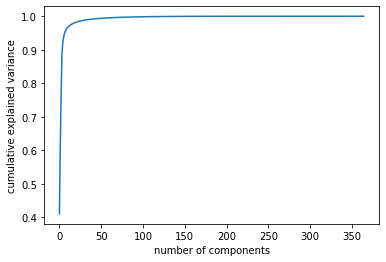

In [42]:
f =np.cumsum(pca.explained_variance_ratio_)
plt.plot(f)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Now that the have a graph depicting the "number of components" vs "Cumulative Explained variance",  
the next logical question that follows is how do we pick the most informative components that yield the optimum cumulative explained variance?  
To answer that question, we zoom into the graph, especially, at upper left angle where the curve start flattening.  
It is the rate (think slope of the slope, or second order derivative) at which the flattening happens that is going to inform us  
when/where we should stop looking further.  
It seems the elbow of the curve can be cornered in the upper left angle delimited by the cartesian coordinates ``(50, 0.9)``.  
So let's zoom in by limiting   
the x-axis to 50 ``plt.xlim(0,50)``  
the y-axis to [0.9 to 1] ``plt.ylim(.9,1)``   
and also add a grid to help us read ``plt.grid(True)``.  

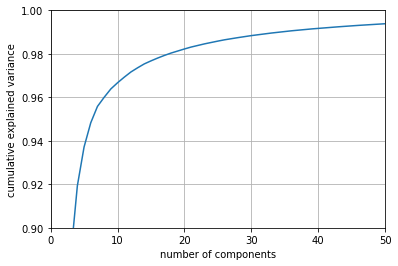

In [43]:
plt.plot(f)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.xlim(0,50)
plt.ylim(.9,1)
plt.show()

From the above graph, the optimum cumulative explained variance will be between ``[0.95 - 0.99]``  
We can create a PCA that captures 97% (middle of ``[0.95 - 0.99]`` ) of variance, but this is a rather arbitrary decision.  
So let's use the mean of explained variance method.  

In [44]:
print(f'The mean explained_variance_ratio is {np.mean(pca.explained_variance_ratio_)}')

The mean explained_variance_ratio is 0.0027397260273972603


In [45]:
print(f'The number of features whose mean are greater than the mean explained_variance_ratio is {np.sum([pca.explained_variance_ratio_ > np.mean(pca.explained_variance_ratio_)])}')

The number of features whose mean are greater than the mean explained_variance_ratio is 11


Let's compare this number to the midpoint method discussed above.  

In [46]:
pca = PCA(n_components=0.97, whiten=True)
norm_features = pca.fit_transform(norm_train_df)

In [47]:
print(f'The midpoint method retains {norm_features.shape[1]} candidate features')

The midpoint method retains 13 candidate features


More is better, as the saying goes. Let's retain the midpoint method with the 13 features for the prediction.  

Task 5: Predict your test_df values using XGBoost.

---

We have training set and testing set. We want to predict using XGBoost on the testing set.  
There are two possible approaches:   
a) train the model using the entire training set,then test the model using the testing set.  
b) split the training set into train and validation data sets, then test using the testing set.  
In this project we are going to use the second approach.  

In [48]:
# Import necessary modules
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [49]:
print(xgb.__version__)

1.2.0


In [50]:
## Splitting into training and validations  sets
X_train, X_val, y_train, y_val = train_test_split(mbtrain_df.iloc[:,1:], mbtrain_df['y'].values, test_size=0.25, random_state=4321)

In [51]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3156, 365), (1053, 365), (3156,), (1053,))

We instantiate an XGBoost Regressor class with the following parameters:  
We use a squared error loss function ``"reg:squarederror"`` as our objective.  
To avoid the possibility of overfitting, we set the depth of a tree to 7 ``'max_depth': 7``.  
How fast we want the learning algorithm to converge to an optimum solution is set to 0.2 ``'learning_rate': 0.2``  
Since we have a lot of features to start with (360+), we set the percent of features (subsample ratio) to   
be used per tree to 10% ``'colsample_bytree':0.1``  
That will be sampling about 36 features in every boosting iteration.  
For a moderate L1 regularization on weights, we set alpha = 10 ``'alpha': 10``.  

In [52]:
train_xgb_reg = xgb.XGBRegressor( objective = 'reg:squarederror', colsample_bytree = 0.1,  learning_rate = 0.2, max_depth = 7, alpha = 10)

We now fit and validate the training model  

In [53]:
train_xgb_reg.fit(X_train,y_train)
train_valid = train_xgb_reg.predict(X_val)

In [54]:
training_rmse = np.sqrt(mean_squared_error(y_val, train_valid))
print(f'Training RMSE: {training_rmse}')

Training RMSE: 9.804432369870364


In [55]:
train_xgb_reg.score(X_train,y_train)

0.7896672205622408

Testing the  model on unseen data  

In [56]:
testing_preds = train_xgb_reg.predict(mbtest_df)

In [57]:
testing_rmse = np.sqrt(mean_squared_error(mbtrain_df['y'], testing_preds))
print(f'Testing RMSE: {testing_rmse}')

Testing RMSE: 15.670846627487933


**Conclusion**  
We can see that we got a larger RMSE for the testing. This suggest the model did not do well on the testing set.  
A better way would be to use the Cross Validation method of XGBoost to help identify the features that will yield a better training RMSE.  
We then use the model with a better RMSE to predict.  